<div id="capstone_business_problem">
    <h1>Capstone - Seattle Traffic Accident Severity Prediction</h1>
    <h2>1. Introduction</h2>
    Do you live in a safe city? Can your children walk safe and free? Is Seattle a city for tourists? So many questions and maybe no answer now. <br>In the past 5 years, Seattle has received many complaints about unsafe neighborhoods, most of them related to car accidents. In addition, the big car rental companies complain that last quarter, tourists no longer rent cars since Seattle is one of the cities with the most car collisions in the United States. With all of this in mind, the top priority for Seattle's municipal government is to ensure that it can reduce the large number of accidents and return to being the safe city it was before.<br> 
    <h2>2. Business Problem</h2>
    The objective of this capstone project is to analyze and study the collision dataset for the city of Seattle, Washington and find patterns and determinate key factors such as weather, visibility, and road conditions to create the best traffic accident severity prediction. It will use various analytical techniques and machine learning classification algorithms such as k-nearest-neighbors, Support Vector Machine, etc.
    <br>
    This project will build on and study the possible answers to the following question: How can the city of Seattle create the best model prediction of Traffic Accident Severity and how can it improve to address this issue?
    <br>
    After this study, we can provide the result to different goverment departments, rental car companies, insurance companies and emergency contacts as well.
</div>

<h2>3. Data</h2>

The data that will be used to conduct the study is based on the collection of traffic accidents from 2004 to present in the city of Seattle, Washington. The data resource is updated weekly by the Seattle Department of Transportation.
This dataset (.csv file), with 194,673 rows and 38 columns, contains information such as:
* Severity of the accident
* Type of collision
* Location accident
* Number of vehicles involved
* Weather conditions
* Road conditions
* Any pedestrians involved
* etc

There are some features that are able to determine potentially dangerous places where serious accidents are most likely to occur, for example, road conditions, light conditions, types of junctions and then add the weather conditions 
which increases the risk of accident.
Finally, the dataset contains a column with the severity code for each accident that ranges from 0 (unknown) to 3 (fatality). 

This study is focused on predicting the level of severity of the collision and being able to prevent new accidents from taking place at potentially dangerous intersections by placing traffic signs to prevent them. To do this, we can ask some question such as:
* How do road and weather conditions affect accident severity in some specific locations?
* Is it necessary to invest in fixing the roads to prevent accidents?

We hope to be able to answer these questions and more in this project.

In [1]:
import numpy as np 
import pandas as pd

In [2]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


### Lets load required libraries

In [3]:
import itertools
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import log_loss
%matplotlib inline

### Load Data From CSV File

In [4]:
df = pd.read_csv('Data-Collisions.csv')
df.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [5]:
df_geo = df.copy()

<div id="visualization_analysis">
    <h2>Data Visualization and Analysis</h2> 
</div>

How many rows and columns are in this dataset in total? What are the name of columns?

In [6]:
df.shape
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

Rows: 194673
Columns: 38


In [7]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

### Feature set

Lets see the type from our columns:

In [8]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

Lets define our index in the set data:

In [9]:
df.set_index('INCKEY', inplace=True)

In [10]:
df

,SEVERITYCODE,X,Y,OBJECTID,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
INCKEY,,,,,,,,,,,,,,,,,,,,,
1307,2,-122.323148,47.703140,1,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
52200,1,-122.347294,47.647172,2,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
26700,1,-122.334540,47.607871,3,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
1144,1,-122.334803,47.604803,4,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
17700,2,-122.306426,47.545739,5,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309534,2,-122.290826,47.565408,219543,310814,E871089,Matched,Block,NaN,34TH AVE S BETWEEN S DAKOTA ST AND S GENESEE ST,...,Dry,Daylight,NaN,NaN,NaN,24,From opposite direction - both moving - head-on,0,0,N
309085,1,-122.344526,47.690924,219544,310365,E876731,Matched,Block,NaN,AURORA AVE N BETWEEN N 85TH ST AND N 86TH ST,...,Wet,Daylight,NaN,NaN,NaN,13,From same direction - both going straight - bo...,0,0,N
311280,2,-122.306689,47.683047,219545,312640,3809984,Matched,Intersection,24760.0,20TH AVE NE AND NE 75TH ST,...,Dry,Daylight,NaN,NaN,NaN,28,From opposite direction - one left turn - one ...,0,0,N


Lets see how many severity codes are in our data set.

In [87]:
df.groupby("SEVERITYCODE")["SEVERITYCODE"].count()

SEVERITYCODE
1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

1: Prop damage --> Total: 136485
<br>
2: Injury --> Total: 58188

Lets see how many types of collisions we have.

In [88]:
df['COLLISIONTYPE'].value_counts()

Parked Car    47987
Angles        34674
Rear Ended    34090
Other         23703
Sideswipe     18609
Left Turn     13703
Pedestrian     6608
Cycles         5415
Right Turn     2956
Head On        2024
Name: COLLISIONTYPE, dtype: int64

Combine severity code with type of collisions

In [13]:
df.groupby(['COLLISIONTYPE'])['SEVERITYCODE'].value_counts()

COLLISIONTYPE  SEVERITYCODE
Angles         1               21050
               2               13624
Cycles         2                4744
               1                 671
Head On        1                1152
               2                 872
Left Turn      1                8292
               2                5411
Other          1               17591
               2                6112
Parked Car     1               45325
               2                2662
Pedestrian     2                5936
               1                 672
Rear Ended     1               19419
               2               14671
Right Turn     1                2347
               2                 609
Sideswipe      1               16103
               2                2506
Name: SEVERITYCODE, dtype: int64

Normalize the values

In [14]:
df.groupby(['COLLISIONTYPE'])['SEVERITYCODE'].value_counts(normalize=True)

COLLISIONTYPE  SEVERITYCODE
Angles         1               0.607083
               2               0.392917
Cycles         2               0.876085
               1               0.123915
Head On        1               0.569170
               2               0.430830
Left Turn      1               0.605123
               2               0.394877
Other          1               0.742142
               2               0.257858
Parked Car     1               0.944527
               2               0.055473
Pedestrian     2               0.898305
               1               0.101695
Rear Ended     1               0.569639
               2               0.430361
Right Turn     1               0.793978
               2               0.206022
Sideswipe      1               0.865334
               2               0.134666
Name: SEVERITYCODE, dtype: float64

Lets study the feature "The total number of people involved in the collision". How many collisions for each group of people

In [15]:
df['PERSONCOUNT'].value_counts()

2     114231
3      35553
4      14660
1      13154
5       6584
0       5544
6       2702
7       1131
8        533
9        216
10       128
11        56
12        33
13        21
14        19
15        11
17        11
16         8
44         6
18         6
20         6
25         6
19         5
26         4
22         4
27         3
28         3
29         3
47         3
32         3
34         3
37         3
23         2
21         2
24         2
30         2
36         2
57         1
31         1
35         1
39         1
41         1
43         1
48         1
53         1
54         1
81         1
Name: PERSONCOUNT, dtype: int64

Combine severity code with the number of people involved in the collisions

In [16]:
df.groupby(["PERSONCOUNT"])['SEVERITYCODE'].value_counts()

PERSONCOUNT  SEVERITYCODE
0            1                3782
             2                1762
1            1                9858
             2                3296
2            1               86420
                             ...  
48           2                   1
53           1                   1
54           2                   1
57           1                   1
81           2                   1
Name: SEVERITYCODE, Length: 79, dtype: int64

Normalize the values

In [17]:
df.groupby(["PERSONCOUNT"])['SEVERITYCODE'].value_counts(normalize=True)

PERSONCOUNT  SEVERITYCODE
0            1               0.682179
             2               0.317821
1            1               0.749430
             2               0.250570
2            1               0.756537
                               ...   
48           2               1.000000
53           1               1.000000
54           2               1.000000
57           1               1.000000
81           2               1.000000
Name: SEVERITYCODE, Length: 79, dtype: float64

Lets study the feature "The number of pedestrians involved in the collision". How many collisions for each group of pedestrian.

In [18]:
df['PEDCOUNT'].value_counts()

0    187734
1      6685
2       226
3        22
4         4
6         1
5         1
Name: PEDCOUNT, dtype: int64

Combine severity code with the number of pedestrians involved in the collisions

In [19]:
df.groupby(["PEDCOUNT"])['SEVERITYCODE'].value_counts()

PEDCOUNT  SEVERITYCODE
0         1               135787
          2                51947
1         2                 6007
          1                  678
2         2                  207
          1                   19
3         2                   21
          1                    1
4         2                    4
5         2                    1
6         2                    1
Name: SEVERITYCODE, dtype: int64

Normalize the values

In [20]:
df.groupby(["PEDCOUNT"])['SEVERITYCODE'].value_counts(normalize=True)

PEDCOUNT  SEVERITYCODE
0         1               0.723295
          2               0.276705
1         2               0.898579
          1               0.101421
2         2               0.915929
          1               0.084071
3         2               0.954545
          1               0.045455
4         2               1.000000
5         2               1.000000
6         2               1.000000
Name: SEVERITYCODE, dtype: float64

The number of bicycles involved in the collision. 

In [21]:
df['PEDCYLCOUNT'].value_counts()

0    189189
1      5441
2        43
Name: PEDCYLCOUNT, dtype: int64

Combine with the severity code

In [22]:
df.groupby(["PEDCYLCOUNT"])['SEVERITYCODE'].value_counts()

PEDCYLCOUNT  SEVERITYCODE
0            1               135806
             2                53383
1            2                 4762
             1                  679
2            2                   43
Name: SEVERITYCODE, dtype: int64

Normalized the values

In [23]:
df.groupby(["PEDCYLCOUNT"])['SEVERITYCODE'].value_counts(normalize=True)

PEDCYLCOUNT  SEVERITYCODE
0            1               0.717832
             2               0.282168
1            2               0.875207
             1               0.124793
2            2               1.000000
Name: SEVERITYCODE, dtype: float64

The number of vehicles involved in the collision

In [24]:
df['VEHCOUNT'].value_counts()

2     147650
1      25748
3      13010
0       5085
4       2426
5        529
6        146
7         46
8         15
9          9
11         6
10         2
12         1
Name: VEHCOUNT, dtype: int64

Combine  with the severity code

In [25]:
df.groupby(["VEHCOUNT"])['SEVERITYCODE'].value_counts()

VEHCOUNT  SEVERITYCODE
0         1                 3858
          2                 1227
1         2                14105
          1                11643
2         1               111701
          2                35949
3         1                 7540
          2                 5470
4         1                 1348
          2                 1078
5         1                  268
          2                  261
6         1                   86
          2                   60
7         1                   24
          2                   22
8         1                   10
          2                    5
9         2                    6
          1                    3
10        2                    2
11        1                    3
          2                    3
12        1                    1
Name: SEVERITYCODE, dtype: int64

Normalized the values

In [26]:
df.groupby(["VEHCOUNT"])['SEVERITYCODE'].value_counts(normalize=True)

VEHCOUNT  SEVERITYCODE
0         1               0.758702
          2               0.241298
1         2               0.547810
          1               0.452190
2         1               0.756526
          2               0.243474
3         1               0.579554
          2               0.420446
4         1               0.555647
          2               0.444353
5         1               0.506616
          2               0.493384
6         1               0.589041
          2               0.410959
7         1               0.521739
          2               0.478261
8         1               0.666667
          2               0.333333
9         2               0.666667
          1               0.333333
10        2               1.000000
11        1               0.500000
          2               0.500000
12        1               1.000000
Name: SEVERITYCODE, dtype: float64

The date of the incident. 

In [11]:
df['INCDATE']

INCKEY
1307      2013/03/27 00:00:00+00
52200     2006/12/20 00:00:00+00
26700     2004/11/18 00:00:00+00
1144      2013/03/29 00:00:00+00
17700     2004/01/28 00:00:00+00
                   ...          
309534    2018/11/12 00:00:00+00
309085    2018/12/18 00:00:00+00
311280    2019/01/19 00:00:00+00
309514    2019/01/15 00:00:00+00
308220    2018/11/30 00:00:00+00
Name: INCDATE, Length: 194673, dtype: object

In [12]:
df['INCDATE'] = pd.to_datetime(df['INCDATE'])
df['INCDATE']

INCKEY
1307     2013-03-27 00:00:00+00:00
52200    2006-12-20 00:00:00+00:00
26700    2004-11-18 00:00:00+00:00
1144     2013-03-29 00:00:00+00:00
17700    2004-01-28 00:00:00+00:00
                    ...           
309534   2018-11-12 00:00:00+00:00
309085   2018-12-18 00:00:00+00:00
311280   2019-01-19 00:00:00+00:00
309514   2019-01-15 00:00:00+00:00
308220   2018-11-30 00:00:00+00:00
Name: INCDATE, Length: 194673, dtype: datetime64[ns, UTC]

Create a new columns with the day of the week for each accident

In [13]:
df['DAYWEEK'] = df['INCDATE'].dt.dayofweek

Lets see how many type of accident we have per day of the week

In [14]:
print(df.groupby(["DAYWEEK"])['SEVERITYCODE'].value_counts())
print("The day of the week with Monday=0, Sunday=6")

DAYWEEK  SEVERITYCODE
0        1               18365
         2                7973
1        1               19825
         2                8731
2        1               20021
         2                8757
3        1               20306
         2                9018
4        1               22774
         2                9559
5        1               19342
         2                8047
6        1               15852
         2                6103
Name: SEVERITYCODE, dtype: int64
The day of the week with Monday=0, Sunday=6


In [15]:
# create a dataframe with the result of DAYWEEK and SEVERITYCODE 
data_week = [['Property Damage', 18365, 19825, 20021, 20306, 22774, 19342, 15852], ['Injury', 7973, 8731, 8757, 9018, 9559, 8047, 6103]] 
  
# Create the pandas DataFrame 
df_week = pd.DataFrame(data_week, columns = ['Severity_Code','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']) 
df_week.set_index('Severity_Code', inplace=True)
# print dataframe. 
df_week 

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Severity_Code,,,,,,,
Property Damage,18365,19825,20021,20306,22774,19342,15852
Injury,7973,8731,8757,9018,9559,8047,6103


In [16]:
df_week_1 = df_week.loc[['Property Damage', 'Injury'], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']].transpose()
df_week_1

Severity_Code,Property Damage,Injury
Monday,18365,7973
Tuesday,19825,8731
Wednesday,20021,8757
Thursday,20306,9018
Friday,22774,9559
Saturday,19342,8047
Sunday,15852,6103


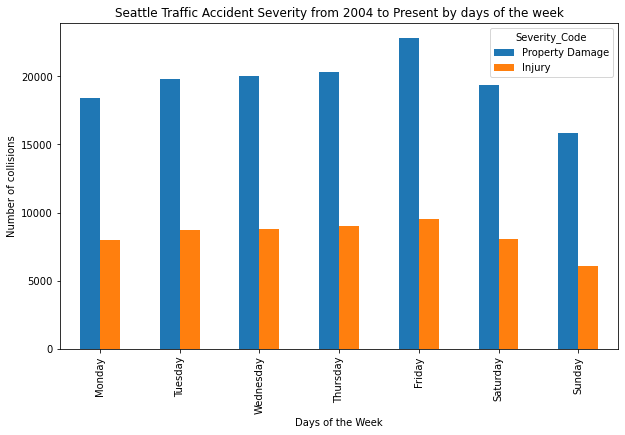

In [17]:
df_week_1.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Days of the Week') # add to x-label to the plot
plt.ylabel('Number of collisions') # add y-label to the plot
plt.title('Seattle Traffic Accident Severity from 2004 to Present by days of the week') # add title to the plot

plt.show()

In [19]:
df_week_1['total'] = df_week_1.sum(axis=1)
df_week_1

Severity_Code,Property Damage,Injury,total
Monday,18365,7973,26338
Tuesday,19825,8731,28556
Wednesday,20021,8757,28778
Thursday,20306,9018,29324
Friday,22774,9559,32333
Saturday,19342,8047,27389
Sunday,15852,6103,21955


In [20]:
df_week_1 = df_week_1.div(df_week_1.total, axis='index')
df_week_1.drop(['total'], axis=1,inplace=True)
df_week_1

Severity_Code,Property Damage,Injury
Monday,0.697281,0.302719
Tuesday,0.694250,0.305750
Wednesday,0.695705,0.304295
Thursday,0.692470,0.307530
Friday,0.704358,0.295642
Saturday,0.706196,0.293804
Sunday,0.722022,0.277978


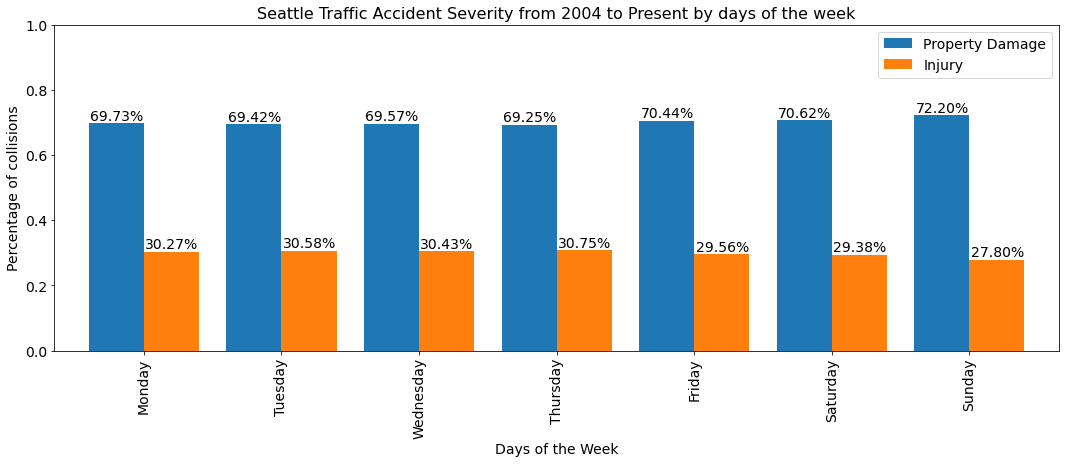

In [22]:
ax0 = df_week_1.plot(kind='bar',
                    figsize=(18, 6),
                    width=0.8, 
                    fontsize=14
                   )
ax0.legend(fontsize=14, facecolor ='white')
ax0.set_title('Seattle Traffic Accident Severity from 2004 to Present by days of the week', fontsize=16)
ax0.set_facecolor('white')
ax0.set_xlabel('Days of the Week', fontsize=14)
ax0.set_ylabel('Percentage of collisions', fontsize=14)
ax0.set_ylim(0, 1)

# annotate value labels
for p in ax0.patches:
    ax0.annotate("{:.2%}".format(p.get_height()),
                xy=(p.get_x()+0.01, p.get_height()+0.01), fontsize=14)


Normalized the values

In [82]:
print(df.groupby(["DAYWEEK"])['SEVERITYCODE'].value_counts(normalize=True))
print("The day of the week with Monday=0, Sunday=6")

DAYWEEK  SEVERITYCODE
0        1               0.697281
         2               0.302719
1        1               0.694250
         2               0.305750
2        1               0.695705
         2               0.304295
3        1               0.692470
         2               0.307530
4        1               0.704358
         2               0.295642
5        1               0.706196
         2               0.293804
6        1               0.722022
         2               0.277978
Name: SEVERITYCODE, dtype: float64
The day of the week with Monday=0, Sunday=6


Category of junction at which collision took place 

In [36]:
df['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              89800
At Intersection (intersection related)               62810
Mid-Block (but intersection related)                 22790
Driveway Junction                                    10671
At Intersection (but not related to intersection)     2098
Ramp Junction                                          166
Unknown                                                  9
Name: JUNCTIONTYPE, dtype: int64

Combine and normalize the values with the severity code

In [37]:
df.groupby(["JUNCTIONTYPE"])['SEVERITYCODE'].value_counts(normalize=True)

JUNCTIONTYPE                                       SEVERITYCODE
At Intersection (but not related to intersection)  1               0.703051
                                                   2               0.296949
At Intersection (intersection related)             1               0.567362
                                                   2               0.432638
Driveway Junction                                  1               0.696936
                                                   2               0.303064
Mid-Block (but intersection related)               1               0.679816
                                                   2               0.320184
Mid-Block (not related to intersection)            1               0.783920
                                                   2               0.216080
Ramp Junction                                      1               0.674699
                                                   2               0.325301
Unknown                 

Normalized the values

Whether or not a driver involved was under the influence of drugs or alcohol. 

In [38]:
df['UNDERINFL'].value_counts()

N    100274
0     80394
Y      5126
1      3995
Name: UNDERINFL, dtype: int64

In [39]:
df.groupby(["UNDERINFL"])['SEVERITYCODE'].value_counts(normalize=True)

UNDERINFL  SEVERITYCODE
0          1               0.717628
           2               0.282372
1          1               0.593742
           2               0.406258
N          1               0.691884
           2               0.308116
Y          1               0.621732
           2               0.378268
Name: SEVERITYCODE, dtype: float64

A description of the weather conditions during the time of the collision. 

In [40]:
df['WEATHER'].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [38]:
df_weather = df_geo[['SEVERITYCODE','WEATHER']]
# Replace value of weather to visibility condition
df_weather['WEATHER'].replace(to_replace=['Clear', 'Raining', 'Overcast', 'Unknown', 'Snowing', 'Other', 'Fog/Smog/Smoke', 'Sleet/Hail/Freezing Rain', 'Blowing Sand/Dirt', 'Severe Crosswind','Partly Cloudy'], value=['Good','Reduce Visibility','Good','Draft','Reduce Visibility','Draft','Reduce Visibility','Reduce Visibility','Reduce Visibility','Windy','Good'],inplace=True)
print(df_weather.groupby(["WEATHER"])['SEVERITYCODE'].value_counts())

WEATHER            SEVERITYCODE
Draft              1               14991
                   2                 932
Good               1               94266
                   2               44588
Reduce Visibility  1               23213
                   2               11577
Windy              1                  18
                   2                   7
Name: SEVERITYCODE, dtype: int64


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Delete the type "Draft" that menas other and unknown weather

In [55]:
# create a dataframe with the result of Weather and SEVERITYCODE 
data_weather = [['Property Damage', 14991, 94266, 23213, 18], ['Injury', 932, 44588, 11577, 7]] 
  
# Create the pandas DataFrame 
df_wea = pd.DataFrame(data_weather, columns = ['Severity_Code','Draft','Good','Reduce Visibility','Windy']) 
df_wea.set_index('Severity_Code', inplace=True)
df_wea.drop(['Draft'], axis=1,inplace=True)
# print dataframe. 
df_wea 

,Good,Reduce Visibility,Windy
Severity_Code,,,
Property Damage,94266,23213,18
Injury,44588,11577,7


In [56]:
df_wea['total'] = df_wea.sum(axis=1)
df_wea = df_wea.div(df_wea.total, axis='index')
df_wea.drop(['total'], axis=1,inplace=True)
df_wea

,Good,Reduce Visibility,Windy
Severity_Code,,,
Property Damage,0.802284,0.197562,0.000153
Injury,0.793776,0.206099,0.000125


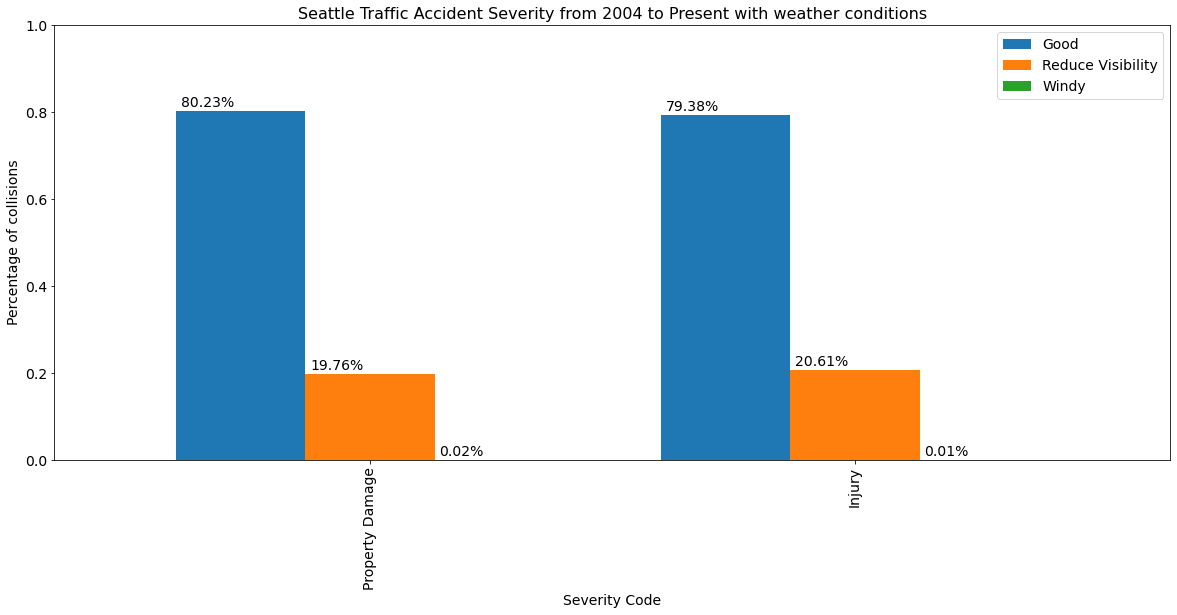

In [57]:
ax0 = df_wea.plot(kind='bar',
                    figsize=(20, 8),
                    width=0.8, 
                    fontsize=14
                   )
ax0.legend(fontsize=14, facecolor ='white')
ax0.set_title('Seattle Traffic Accident Severity from 2004 to Present with weather conditions', fontsize=16)
ax0.set_facecolor('white')
ax0.set_xlabel('Severity Code', fontsize=14)
ax0.set_ylabel('Percentage of collisions', fontsize=14)
ax0.set_ylim(0, 1)

# annotate value labels
for p in ax0.patches:
    ax0.annotate("{:.2%}".format(p.get_height()),
                xy=(p.get_x()+0.01, p.get_height()+0.01), fontsize=14)

In [41]:
df.groupby(["WEATHER"])['SEVERITYCODE'].value_counts(normalize=True)

WEATHER                   SEVERITYCODE
Blowing Sand/Dirt         1               0.732143
                          2               0.267857
Clear                     1               0.677509
                          2               0.322491
Fog/Smog/Smoke            1               0.671353
                          2               0.328647
Other                     1               0.860577
                          2               0.139423
Overcast                  1               0.684456
                          2               0.315544
Partly Cloudy             2               0.600000
                          1               0.400000
Raining                   1               0.662815
                          2               0.337185
Severe Crosswind          1               0.720000
                          2               0.280000
Sleet/Hail/Freezing Rain  1               0.752212
                          2               0.247788
Snowing                   1               0

The condition of the road during the collision. 

In [42]:
df['ROADCOND'].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [64]:
df_road = df_geo[['SEVERITYCODE','ROADCOND']]
# Replace value of light conditions to visibility light condition
df_road['ROADCOND'].replace(to_replace=['Dry', 'Ice', 'Oil', 'Other', 'Sand/Mud/Dirt', 'Snow/Slush', 'Standing Water', 'Unknown', 'Wet'], value=['Dry','Ice', 'Oil','Draft','Sand','Snow','Water','Draft','Wet'],inplace=True)
print(df_road.groupby(["ROADCOND"])['SEVERITYCODE'].value_counts())

ROADCOND  SEVERITYCODE
Draft     1               14418
          2                 792
Dry       1               84446
          2               40064
Ice       1                 936
          2                 273
Oil       1                  40
          2                  24
Sand      1                  52
          2                  23
Snow      1                 837
          2                 167
Water     1                  85
          2                  30
Wet       1               31719
          2               15755
Name: SEVERITYCODE, dtype: int64


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [70]:
# create a dataframe with the result of road condition and SEVERITYCODE 
data_road = [['Property Damage', 14418, 84446, 936, 40, 52, 837, 85, 31719], ['Injury', 792, 400064, 273, 24, 23, 167, 30, 15755]] 
  
# Create the pandas DataFrame 
df_rd = pd.DataFrame(data_road, columns = ['Severity_Code','Draft', 'Dry', 'Ice', 'Oil', 'Sand', 'Snow', 'Water', 'Wet']) 
df_rd.set_index('Severity_Code', inplace=True)
df_rd.drop(['Draft'], axis=1,inplace=True)
# print dataframe. 
df_rd 

,Dry,Ice,Oil,Sand,Snow,Water,Wet
Severity_Code,,,,,,,
Property Damage,84446,936,40,52,837,85,31719
Injury,400064,273,24,23,167,30,15755


In [71]:
df_rd['total'] = df_rd.sum(axis=1)
df_rd = df_rd.div(df_rd.total, axis='index')
df_rd.drop(['total'], axis=1,inplace=True)
df_rd

,Dry,Ice,Oil,Sand,Snow,Water,Wet
Severity_Code,,,,,,,
Property Damage,0.714947,0.007924,0.000339,0.000440,0.007086,0.000720,0.268543
Injury,0.960916,0.000656,0.000058,0.000055,0.000401,0.000072,0.037842


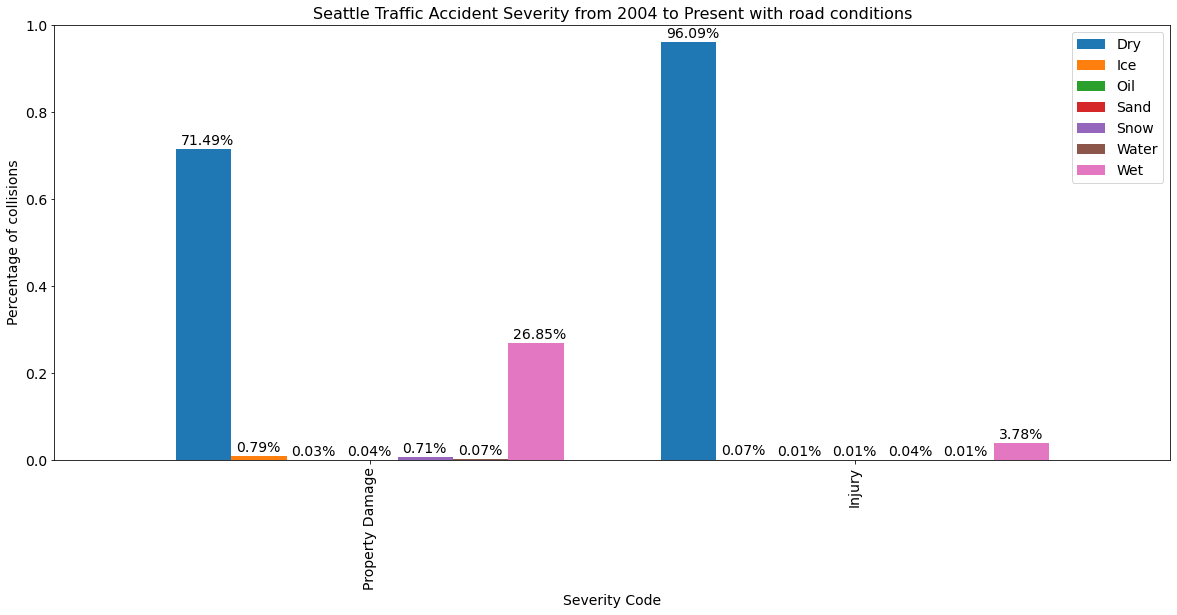

In [72]:
ax0 = df_rd.plot(kind='bar',
                    figsize=(20, 8),
                    width=0.8, 
                    fontsize=14
                   )
ax0.legend(fontsize=14, facecolor ='white')
ax0.set_title('Seattle Traffic Accident Severity from 2004 to Present with road conditions', fontsize=16)
ax0.set_facecolor('white')
ax0.set_xlabel('Severity Code', fontsize=14)
ax0.set_ylabel('Percentage of collisions', fontsize=14)
ax0.set_ylim(0, 1)

# annotate value labels
for p in ax0.patches:
    ax0.annotate("{:.2%}".format(p.get_height()),
                xy=(p.get_x()+0.01, p.get_height()+0.01), fontsize=14)

In [43]:
df.groupby(["ROADCOND"])['SEVERITYCODE'].value_counts(normalize=True)

ROADCOND        SEVERITYCODE
Dry             1               0.678227
                2               0.321773
Ice             1               0.774194
                2               0.225806
Oil             1               0.625000
                2               0.375000
Other           1               0.674242
                2               0.325758
Sand/Mud/Dirt   1               0.693333
                2               0.306667
Snow/Slush      1               0.833665
                2               0.166335
Standing Water  1               0.739130
                2               0.260870
Unknown         1               0.950325
                2               0.049675
Wet             1               0.668134
                2               0.331866
Name: SEVERITYCODE, dtype: float64

The light conditions during the collision. 

In [18]:
df['LIGHTCOND'].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [19]:
df_light = df_geo[['SEVERITYCODE','LIGHTCOND']]
# Replace value of light conditions to visibility light condition
df_light['LIGHTCOND'].replace(to_replace=['Daylight', 'Dark - Street Lights On', 'Dusk', 'Dawn', 'Dark - No Street Lights', 'Dark - Street Lights Off', 'Dark - Unknown Lighting', 'Other', 'Unknown'], value=['Good','Medium','Medium','Medium','Bad','Bad','Bad','Draft','Draft'],inplace=True)
print(df_light.groupby(["LIGHTCOND"])['SEVERITYCODE'].value_counts())

LIGHTCOND  SEVERITYCODE
Bad        1                2093
           2                 654
Draft      1               13051
           2                 657
Good       1               77593
           2               38544
Medium     1               39668
           2               17243
Name: SEVERITYCODE, dtype: int64


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [20]:
# create a dataframe with the result of Light condition and SEVERITYCODE 
data_light = [['Property Damage', 2093, 13051, 77593, 39668], ['Injury', 654, 657, 38544, 17243]] 
  
# Create the pandas DataFrame 
df_lig = pd.DataFrame(data_light, columns = ['Severity_Code','Bad','Draft','Good','Medium']) 
df_lig.set_index('Severity_Code', inplace=True)
df_lig.drop(['Draft'], axis=1,inplace=True)
# print dataframe. 
df_lig 

,Bad,Good,Medium
Severity_Code,,,
Property Damage,2093,77593,39668
Injury,654,38544,17243


In [21]:
df_lig['total'] = df_lig.sum(axis=1)
df_lig = df_lig.div(df_lig.total, axis='index')
df_lig.drop(['total'], axis=1,inplace=True)
df_lig

,Bad,Good,Medium
Severity_Code,,,
Property Damage,0.017536,0.650108,0.332356
Injury,0.011587,0.682908,0.305505


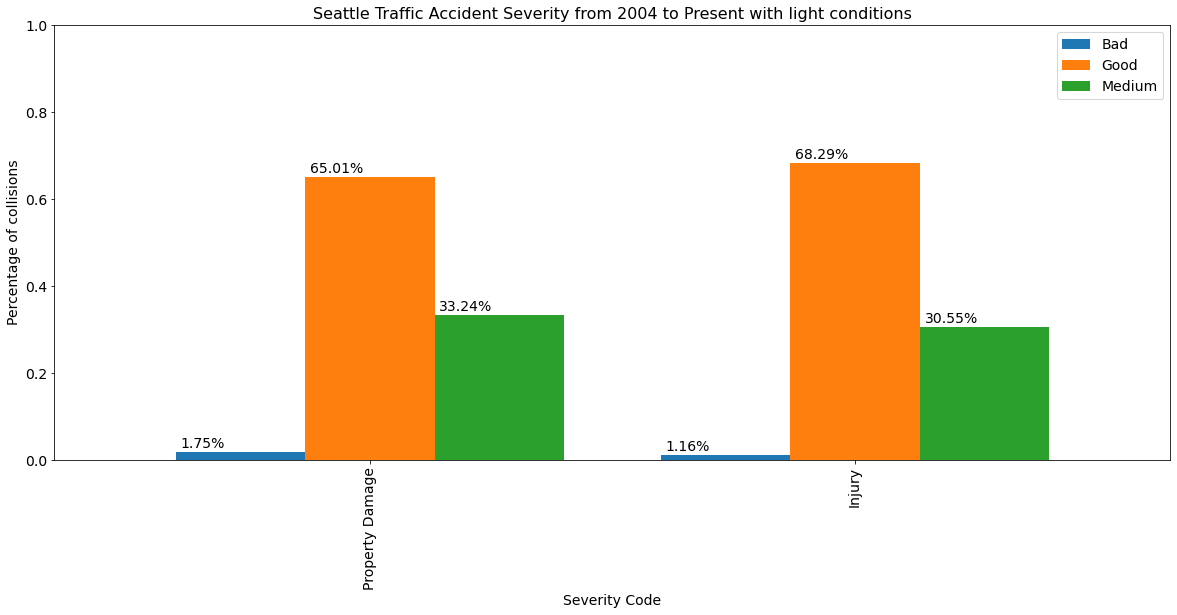

In [24]:
ax0 = df_lig.plot(kind='bar',
                    figsize=(20, 8),
                    width=0.8, 
                    fontsize=14
                   )
ax0.legend(fontsize=14, facecolor ='white')
ax0.set_title('Seattle Traffic Accident Severity from 2004 to Present with light conditions', fontsize=16)
ax0.set_facecolor('white')
ax0.set_xlabel('Severity Code', fontsize=14)
ax0.set_ylabel('Percentage of collisions', fontsize=14)
ax0.set_ylim(0, 1)

# annotate value labels
for p in ax0.patches:
    ax0.annotate("{:.2%}".format(p.get_height()),
                xy=(p.get_x()+0.01, p.get_height()+0.01), fontsize=14)

In [45]:
df.groupby(["LIGHTCOND"])['SEVERITYCODE'].value_counts(normalize=True)

LIGHTCOND                 SEVERITYCODE
Dark - No Street Lights   1               0.782694
                          2               0.217306
Dark - Street Lights Off  1               0.736447
                          2               0.263553
Dark - Street Lights On   1               0.701589
                          2               0.298411
Dark - Unknown Lighting   1               0.636364
                          2               0.363636
Dawn                      1               0.670663
                          2               0.329337
Daylight                  1               0.668116
                          2               0.331884
Dusk                      1               0.670620
                          2               0.329380
Other                     1               0.778723
                          2               0.221277
Unknown                   1               0.955095
                          2               0.044905
Name: SEVERITYCODE, dtype: float64

PEDROWNOTGRNT - Whether or not the pedestrian right of way was not granted. (Y/N)

In [46]:
df['PEDROWNOTGRNT'].value_counts()

Y    4667
Name: PEDROWNOTGRNT, dtype: int64

In [47]:
df.groupby(["PEDROWNOTGRNT"])['SEVERITYCODE'].value_counts(normalize=True)

PEDROWNOTGRNT  SEVERITYCODE
Y              2               0.901436
               1               0.098564
Name: SEVERITYCODE, dtype: float64

SPEEDING - Whether or not speeding was a factor in the collision. (Y/N) 

In [48]:
df.groupby(["SPEEDING"])['SEVERITYCODE'].value_counts(normalize=True)

SPEEDING  SEVERITYCODE
Y         1               0.621665
          2               0.378335
Name: SEVERITYCODE, dtype: float64

ST_COLCODE - A code provided by the state that describes the collision. For more information about these codes, please see the State Collision Code Dictionary. 

In [49]:
df.groupby(["ST_COLCODE"])['SEVERITYCODE'].value_counts(normalize=True)

ST_COLCODE  SEVERITYCODE
0           2               0.909808
            1               0.090192
1           2               0.904145
            1               0.095855
2           2               0.930926
                              ...   
84          2               0.333333
85          1               1.000000
87          2               1.000000
88          1               0.625000
            2               0.375000
Name: SEVERITYCODE, Length: 217, dtype: float64

SEGLANEKEY - A key for the lane segment in which the collision occurred. 

In [50]:
df.groupby(["SEGLANEKEY"])['SEVERITYCODE'].value_counts(normalize=True)

SEGLANEKEY  SEVERITYCODE
0           1               0.709557
            2               0.290443
1189        2               1.000000
1200        2               1.000000
1248        2               1.000000
                              ...   
54728       2               1.000000
59260       2               1.000000
521117      2               1.000000
525169      2               1.000000
525241      2               1.000000
Name: SEVERITYCODE, Length: 2052, dtype: float64

HITPARKEDCAR - Whether or not the collision involved hitting a parked car. (Y/N) 

In [51]:
df.groupby(["HITPARKEDCAR"])['SEVERITYCODE'].value_counts(normalize=True)

HITPARKEDCAR  SEVERITYCODE
N             1               0.691983
              2               0.308017
Y             1               0.937916
              2               0.062084
Name: SEVERITYCODE, dtype: float64

ADDRTYPE - Type of address

In [52]:
df.groupby(["ADDRTYPE"])['SEVERITYCODE'].value_counts(normalize=True)

ADDRTYPE      SEVERITYCODE
Alley         1               0.890812
              2               0.109188
Block         1               0.762885
              2               0.237115
Intersection  1               0.572476
              2               0.427524
Name: SEVERITYCODE, dtype: float64

LOCATION - Description of the general location of the collision 

In [53]:
df.groupby(["LOCATION"])['SEVERITYCODE'].value_counts(normalize=True)

LOCATION                                      SEVERITYCODE
10TH AVE AND E ALDER ST                       1               1.000000
10TH AVE AND E JEFFERSON ST                   1               0.900000
                                              2               0.100000
10TH AVE AND E MADISON ST                     1               0.900000
                                              2               0.100000
                                                                ...   
YORK RD S BETWEEN 36TH AVE S AND 37TH AVE S   2               0.250000
YORK RD S BETWEEN S HORTON ST AND 36TH AVE S  1               0.500000
                                              2               0.500000
YUKON AVE S AND S HENDERSON ST                2               0.666667
                                              1               0.333333
Name: SEVERITYCODE, Length: 35081, dtype: float64

SDOT_COLCODE

In [54]:
df.groupby(["SDOT_COLCODE"])['SEVERITYCODE'].value_counts(normalize=True)

SDOT_COLCODE  SEVERITYCODE
0             1               0.927659
              2               0.072341
11            1               0.714373
              2               0.285627
12            1               0.981250
                                ...   
66            1               0.043478
68            2               0.750000
              1               0.250000
69            2               0.985507
              1               0.014493
Name: SEVERITYCODE, Length: 73, dtype: float64

Replace values for the columns with type string to Float/Int

In [55]:
df['ADDRTYPE'].replace(to_replace=['Alley','Block','Intersection'], value=[0,1,2],inplace=True)

In [56]:
df['COLLISIONTYPE'].replace(to_replace=['Rear Ended', 'Angles', 'Parked Car', 'Other', 'Sideswipe', 'Left Turn', 'Pedestrian', 'Cycles', 'Right Turn', 'Head On'], value=[0,1,2,3,4,5,6,7,8,9],inplace=True)

In [57]:
df['JUNCTIONTYPE'].replace(to_replace=['Mid-Block (not related to intersection)', 'At Intersection (intersection related)', 'Mid-Block (but intersection related)', 'Driveway Junction', 'At Intersection (but not related to intersection)', 'Ramp Junction', 'Unknown'], value=[0,1,2,3,4,5,6],inplace=True)

In [58]:

df['WEATHER'].replace(to_replace=['Clear', 'Raining', 'Overcast', 'Unknown', 'Snowing', 'Other', 'Fog/Smog/Smoke', 'Sleet/Hail/Freezing Rain', 'Blowing Sand/Dirt', 'Severe Crosswind','Partly Cloudy'], value=[0,1,2,3,4,5,6,7,8,9,10],inplace=True)

In [59]:
df['ROADCOND'].replace(to_replace=['Dry', 'Ice', 'Oil', 'Other', 'Sand/Mud/Dirt', 'Snow/Slush', 'Standing Water', 'Unknown', 'Wet'], value=[0,1,2,3,4,5,6,7,8],inplace=True)

In [60]:

df['LIGHTCOND'].replace(to_replace=['Daylight', 'Dark - Street Lights On', 'Dusk', 'Dawn', 'Dark - No Street Lights', 'Dark - Street Lights Off', 'Dark - Unknown Lighting', 'Other', 'Unknown'], value=[0,1,2,3,4,5,6,7,8],inplace=True)

In [61]:
df['PEDROWNOTGRNT'].replace(to_replace='Y', value=1,inplace=True)
df['PEDROWNOTGRNT'].fillna(0, inplace=True)

In [62]:
df['SPEEDING'].replace(to_replace='Y', value=1,inplace=True)
df['SPEEDING'].fillna(0, inplace=True)

In [63]:
df['HITPARKEDCAR'].replace(to_replace=['Y','N'], value=[1,0],inplace=True)

Check the type of our data

In [64]:
df.dtypes

SEVERITYCODE                    int64
X                             float64
Y                             float64
OBJECTID                        int64
COLDETKEY                       int64
REPORTNO                       object
STATUS                         object
ADDRTYPE                      float64
INTKEY                        float64
LOCATION                       object
EXCEPTRSNCODE                  object
EXCEPTRSNDESC                  object
SEVERITYCODE.1                  int64
SEVERITYDESC                   object
COLLISIONTYPE                 float64
PERSONCOUNT                     int64
PEDCOUNT                        int64
PEDCYLCOUNT                     int64
VEHCOUNT                        int64
INCDATE           datetime64[ns, UTC]
INCDTTM                        object
JUNCTIONTYPE                  float64
SDOT_COLCODE                    int64
SDOT_COLDESC                   object
INATTENTIONIND                 object
UNDERINFL                      object
WEATHER     

Create de data Features to use in the model Machine Learning

In [65]:
features = df[['SEVERITYCODE','ADDRTYPE','JUNCTIONTYPE','COLLISIONTYPE','VEHCOUNT','PEDCYLCOUNT','PERSONCOUNT','PEDCOUNT','SDOT_COLCODE','ROADCOND','LIGHTCOND','WEATHER','PEDROWNOTGRNT','SPEEDING','HITPARKEDCAR']]
features.head()

,SEVERITYCODE,ADDRTYPE,JUNCTIONTYPE,COLLISIONTYPE,VEHCOUNT,PEDCYLCOUNT,PERSONCOUNT,PEDCOUNT,SDOT_COLCODE,ROADCOND,LIGHTCOND,WEATHER,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
INCKEY,,,,,,,,,,,,,,,
1307,2,2.0,1.0,1.0,2,0,2,0,11,8.0,0.0,2.0,0.0,0.0,0
52200,1,1.0,0.0,4.0,2,0,2,0,16,8.0,1.0,1.0,0.0,0.0,0
26700,1,1.0,0.0,2.0,3,0,4,0,14,0.0,0.0,2.0,0.0,0.0,0
1144,1,1.0,0.0,3.0,3,0,3,0,11,0.0,0.0,0.0,0.0,0.0,0
17700,2,2.0,1.0,1.0,2,0,2,0,11,8.0,0.0,1.0,0.0,0.0,0


Check NaN cells

In [66]:
features.isna().sum()

SEVERITYCODE        0
ADDRTYPE         1926
JUNCTIONTYPE     6329
COLLISIONTYPE    4904
VEHCOUNT            0
PEDCYLCOUNT         0
PERSONCOUNT         0
PEDCOUNT            0
SDOT_COLCODE        0
ROADCOND         5012
LIGHTCOND        5170
WEATHER          5081
PEDROWNOTGRNT       0
SPEEDING            0
HITPARKEDCAR        0
dtype: int64

Drop NaN's

In [67]:
features.dropna(inplace=True)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [68]:
features.isna().sum()

SEVERITYCODE     0
ADDRTYPE         0
JUNCTIONTYPE     0
COLLISIONTYPE    0
VEHCOUNT         0
PEDCYLCOUNT      0
PERSONCOUNT      0
PEDCOUNT         0
SDOT_COLCODE     0
ROADCOND         0
LIGHTCOND        0
WEATHER          0
PEDROWNOTGRNT    0
SPEEDING         0
HITPARKEDCAR     0
dtype: int64

In [69]:
print("Rows:", features.shape[0])
print("Columns:", features.shape[1])

Rows: 182895
Columns: 15


Check the type of our data features

In [70]:
features.dtypes

SEVERITYCODE       int64
ADDRTYPE         float64
JUNCTIONTYPE     float64
COLLISIONTYPE    float64
VEHCOUNT           int64
PEDCYLCOUNT        int64
PERSONCOUNT        int64
PEDCOUNT           int64
SDOT_COLCODE       int64
ROADCOND         float64
LIGHTCOND        float64
WEATHER          float64
PEDROWNOTGRNT    float64
SPEEDING         float64
HITPARKEDCAR       int64
dtype: object

Lets prepare the data for the model X and y

In [71]:
X=features[['ADDRTYPE','JUNCTIONTYPE','COLLISIONTYPE','VEHCOUNT','PEDCYLCOUNT','PERSONCOUNT','PEDCOUNT','SDOT_COLCODE','ROADCOND','LIGHTCOND','WEATHER','PEDROWNOTGRNT','SPEEDING','HITPARKEDCAR']]
y=features['SEVERITYCODE']

In [72]:
X.shape

(182895, 14)

In [73]:
y.shape

(182895,)

Normalize the dataset:

In [74]:
X = preprocessing.StandardScaler().fit(X).transform(X)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


Split our dataset into train and test set:

In [75]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

In [76]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (146316, 14) (146316,)
Test set: (36579, 14) (36579,)


<h1 align=center><font size="5">Studying different models of Machine Learning</font></h1>

<h2><font size="5"> K-Nearest Neighbors algorithm</font></h2>
Calculate the accuracy of KNN for different Ks

In [72]:
Ks = 30
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.65359906, 0.71292272, 0.69785943, 0.72973564, 0.71819897,
       0.73047377, 0.71983925, 0.73137593, 0.72765795, 0.73741764,
       0.73091118, 0.7363788 , 0.73238744, 0.73908527, 0.73337161,
       0.74124498, 0.73930397, 0.73968671, 0.73979606, 0.74283059,
       0.74201044, 0.74162771, 0.74129965, 0.74324066, 0.74110829,
       0.74236584, 0.74201044, 0.74247519, 0.74206512])

Plot

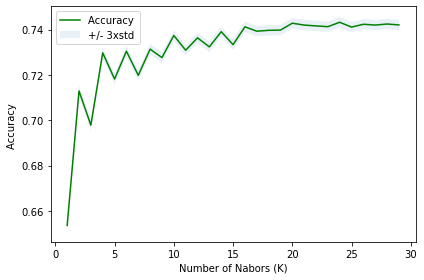

In [73]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [74]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7432406572076875 with k= 24


Select the best k and calculate F1-score and Jaccard score.

In [75]:
k = 24
#Train Model and Predict  
neigh_knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat_neigh = neigh_knn.predict(X_test)

In [77]:
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score
print("Avg F1-score: %.2f" % f1_score(y_test, yhat_neigh, average='weighted'))
print("Jaccard score: %.2f" % jaccard_similarity_score(y_test, yhat_neigh))

Avg F1-score: 0.71
Jaccard score: 0.74


<h2 align=center><font size="5"> SVM (Support Vector Machines)</font></h2>
The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:

```
1.Linear
2.Polynomial
3.Radial basis function (RBF)
4.Sigmoid
```

<h3><font size="5"> SVM - Linear</font></h3>

In [75]:
svm_linear = svm.SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
yhat_svm_linear = svm_linear.predict(X_test)
print("Avg F1-score: %.2f" % f1_score(y_test, yhat_svm_linear, average='weighted'))
print("Jaccard score: %.2f" % jaccard_similarity_score(y_test, yhat_svm_linear))

Avg F1-score: 0.67
Jaccard score: 0.74


<h3><font size="5"> SVM - Polynomial</font></h3>

In [ ]:
svm_poly = svm.SVC(kernel='poly', degree=4)
svm_poly.fit(X_train, y_train)
yhat_svm_poly = svm_poly.predict(X_test)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [77]:
print("We don't have data because it takes a lot of computing time.")
#print("Avg F1-score: %.2f" % f1_score(y_test, yhat_svm_poly, average='weighted'))
#print("Jaccard score: %.2f" % jaccard_similarity_score(y_test, yhat_svm_poly))

We don't have data because it takes a lot of computing time.


<h3><font size="5"> SVM - Radial basis function (RBF)</font></h3>

In [72]:
svm_rbf = svm.SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
yhat_svm_rbf = svm_rbf.predict(X_test)
print("Avg F1-score: %.2f" % f1_score(y_test, yhat_svm_rbf, average='weighted'))
print("Jaccard score: %.2f" % jaccard_similarity_score(y_test, yhat_svm_rbf))

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Avg F1-score: 0.70
Jaccard score: 0.75


<h3><font size="5"> SVM - Sigmoid</font></h3>

In [73]:
svm_sigmoid = svm.SVC(kernel='sigmoid')
svm_sigmoid.fit(X_train, y_train)
yhat_svm_sigmoid = svm_sigmoid.predict(X_test)
print("Avg F1-score: %.2f" % f1_score(y_test, yhat_svm_sigmoid, average='weighted'))
print("Jaccard score: %.2f" % jaccard_similarity_score(y_test, yhat_svm_sigmoid))

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Avg F1-score: 0.64
Jaccard score: 0.64


<h2 align=center><font size="5">Decision Trees</font></h2>

In [75]:
depths = 20
avg_f1_tree = np.zeros((depths-1))
jaccard_index_tree = np.zeros((depths-1))
for n in range(1,depths):
    #Train Model and Predict  
    carTree = DecisionTreeClassifier(criterion="entropy", max_depth = n)
    carTree.fit(X_train, y_train)
    yhat_tree = carTree.predict(X_test)
    avg_f1_tree[n-1] = f1_score(y_test, yhat_tree, average='weighted')
    jaccard_index_tree[n-1]=jaccard_similarity_score(y_test, yhat_tree)
    
    
#carTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
#carTree
avg_f1_tree

array([0.66910604, 0.66933358, 0.66933358, 0.70162873, 0.69463189,
       0.70178613, 0.70621115, 0.70764406, 0.71365624, 0.7140924 ,
       0.71510087, 0.71580051, 0.71491989, 0.71282718, 0.71364323,
       0.71177864, 0.71188033, 0.71214919, 0.71089732])

In [76]:
jaccard_index_tree

array([0.7251155 , 0.73610542, 0.73610542, 0.74430684, 0.74389677,
       0.7457831 , 0.7469313 , 0.74777878, 0.74698598, 0.74673993,
       0.74561907, 0.74548238, 0.74594713, 0.74449821, 0.74381476,
       0.74288526, 0.7423385 , 0.74146368, 0.74042483])

In [77]:
#carTree.fit(X_train, y_train)
#yhat_tree = carTree.predict(X_test)


print( "The best accuracy was with", avg_f1_tree.max(), "with depth=", avg_f1_tree.argmax()+1)

The best accuracy was with 0.7158005121105951 with depth= 12


In [79]:
print("Avg F1-score: %.4f" % avg_f1_tree[11])
print("Jaccard index: %.4f" % jaccard_index_tree[11])

Avg F1-score: 0.7158
Jaccard index: 0.7455


<h2 align=center><font size="5">Logistic Regression</font></h2>

In [100]:
Cs = [0.001, 0.01, 0.10, 0.50, 0.75, 1]
avg_f1_lr = np.zeros(len(Cs))
jaccard_index_lr = np.zeros(len(Cs))
logloss_lr = np.zeros(len(Cs))
i = 0
for n in Cs:
    
    #Train Model and Predict  
    LR_model = LogisticRegression(C=n).fit(X_train,y_train)
    yhat_lr = LR_model.predict(X_test)
    yhat_lr_prob = LR_model.predict_proba(X_test)
    avg_f1_lr[i] = f1_score(y_test, yhat_lr, average='weighted')
    jaccard_index_lr[i] = jaccard_similarity_score(y_test, yhat_lr)
    logloss_lr[i] = log_loss(y_test, yhat_lr_prob)
    i = i + 1
avg_f1_lr

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:

array([0.69150935, 0.6920324 , 0.69203288, 0.69203288, 0.69203288,
       0.69203288])

In [101]:
jaccard_index_lr

array([0.74001476, 0.74009678, 0.7400421 , 0.7400421 , 0.7400421 ,
       0.7400421 ])

In [102]:
logloss_lr

array([0.53259792, 0.53227213, 0.53228277, 0.53228424, 0.53228436,
       0.53228443])

In [95]:
print( "The best accuracy was with", avg_f1_lr.max(), "with C = ", Cs[avg_f1_lr.argmax()])

The best accuracy was with 0.6920328844223703 with C =  0.1


In [103]:
print("Avg F1-score: %.4f" % avg_f1_lr[2])
print("LR Jaccard index: %.4f" % jaccard_index_lr[2])
print("LR LogLoss: %.4f" % logloss_lr[2])

Avg F1-score: 0.6920
LR Jaccard index: 0.7400
LR LogLoss: 0.5323


Report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN (k=24)         | 0.74    | 0.71     | NA      |
| Decision Tree      | 0.74    | 0.71     | NA      |
| SVM - Linear       | 0.74    | 0.67     | NA      |
| SVM - Polynomial   | NA      | NA       | NA      |
| SVM - RBF          | 0.75    | 0.70     | NA      |
| SVM - Sigmoid      | 0.64    | 0.64     | NA      |
| LogisticRegression | 0.74    | 0.69     | 0.53    |

<h1 align=center><font size="5">High risk areas</font></h1>

<h3><font size="5">Create the Seattle Map</font></h3>

In [6]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium
from folium.features import CustomIcon
from folium import plugins
print('Folium installed and imported!')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Folium installed and imported!


In [22]:
# define the world map centered around Seattle with a low zoom level
seattle_map = folium.Map(location=[47.44, -122.302], zoom_start=10)

# display world map
#seattle_map

seattle_map.save('seattle_map.html')
# Import the Folium interactive html file

from IPython.display import HTML
HTML('<iframe src=seattle_map.html width=700 height=450></iframe>')

In [23]:
df_geo['PEDROWNOTGRNT'].replace(to_replace='Y', value=1,inplace=True)
df_geo['PEDROWNOTGRNT'].fillna(0, inplace=True)
df_geo['SPEEDING'].replace(to_replace='Y', value=1,inplace=True)
df_geo['SPEEDING'].fillna(0, inplace=True)
df_geo['SEVERITYCODE'].replace(to_replace=[1,2], value=['Prop damage','Injury'],inplace=True)
df_geo['LIGHTCOND'].replace(to_replace=['Daylight', 'Dark - Street Lights On', 'Dusk', 'Dawn', 'Dark - No Street Lights', 'Dark - Street Lights Off', 'Dark - Unknown Lighting', 'Other', 'Unknown'], value=['Good','Medium','Medium','Medium','Bad','Bad','Bad','Draft','Draft'],inplace=True)
df_geo['WEATHER'].replace(to_replace=['Clear', 'Raining', 'Overcast', 'Unknown', 'Snowing', 'Other', 'Fog/Smog/Smoke', 'Sleet/Hail/Freezing Rain', 'Blowing Sand/Dirt', 'Severe Crosswind','Partly Cloudy'], value=['Good','Reduce Visibility','Good','Draft','Reduce Visibility','Draft','Reduce Visibility','Reduce Visibility','Reduce Visibility','Windy','Good'],inplace=True)
df_geo['ROADCOND'].replace(to_replace=['Dry', 'Ice', 'Oil', 'Other', 'Sand/Mud/Dirt', 'Snow/Slush', 'Standing Water', 'Unknown', 'Wet'], value=['Dry','Ice', 'Oil','Draft','Sand','Snow','Water','Draft','Wet'],inplace=True)
features_geo = df_geo[['SEVERITYCODE','X', 'Y','ADDRTYPE','JUNCTIONTYPE','COLLISIONTYPE','VEHCOUNT','PEDCYLCOUNT','PERSONCOUNT','PEDCOUNT','SDOT_COLCODE','ROADCOND','LIGHTCOND','WEATHER','PEDROWNOTGRNT','SPEEDING','HITPARKEDCAR']]
features_geo.head()

,SEVERITYCODE,X,Y,ADDRTYPE,JUNCTIONTYPE,COLLISIONTYPE,VEHCOUNT,PEDCYLCOUNT,PERSONCOUNT,PEDCOUNT,SDOT_COLCODE,ROADCOND,LIGHTCOND,WEATHER,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
0,Injury,-122.323148,47.703140,Intersection,At Intersection (intersection related),Angles,2,0,2,0,11,Wet,Good,Good,0.0,0.0,N
1,Prop damage,-122.347294,47.647172,Block,Mid-Block (not related to intersection),Sideswipe,2,0,2,0,16,Wet,Medium,Reduce Visibility,0.0,0.0,N
2,Prop damage,-122.334540,47.607871,Block,Mid-Block (not related to intersection),Parked Car,3,0,4,0,14,Dry,Good,Good,0.0,0.0,N
3,Prop damage,-122.334803,47.604803,Block,Mid-Block (not related to intersection),Other,3,0,3,0,11,Dry,Good,Good,0.0,0.0,N
4,Injury,-122.306426,47.545739,Intersection,At Intersection (intersection related),Angles,2,0,2,0,11,Wet,Good,Reduce Visibility,0.0,0.0,N


In [24]:
features_geo.isna().sum()

SEVERITYCODE        0
X                5334
Y                5334
ADDRTYPE         1926
JUNCTIONTYPE     6329
COLLISIONTYPE    4904
VEHCOUNT            0
PEDCYLCOUNT         0
PERSONCOUNT         0
PEDCOUNT            0
SDOT_COLCODE        0
ROADCOND         5012
LIGHTCOND        5170
WEATHER          5081
PEDROWNOTGRNT       0
SPEEDING            0
HITPARKEDCAR        0
dtype: int64

In [25]:
features_geo.dropna(inplace=True)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
features_geo.isna().sum()

SEVERITYCODE     0
X                0
Y                0
ADDRTYPE         0
JUNCTIONTYPE     0
COLLISIONTYPE    0
VEHCOUNT         0
PEDCYLCOUNT      0
PERSONCOUNT      0
PEDCOUNT         0
SDOT_COLCODE     0
ROADCOND         0
LIGHTCOND        0
WEATHER          0
PEDROWNOTGRNT    0
SPEEDING         0
HITPARKEDCAR     0
dtype: int64

In [27]:
features_geo.shape

(180067, 17)

<h3><font size="5">Create Cluster Markers</font></h3>

In [29]:
# instantiate a mark cluster object for the incidents in the dataframe
collisions = plugins.MarkerCluster().add_to(seattle_map)

#limit of collisions
limit = 1000
colisi = features_geo[0:limit]

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(colisi.Y, colisi.X, colisi.SEVERITYCODE):
    folium.Marker(
        location=[lat, lng],
        icon=folium.Icon(color='blue', icon='car', prefix='fa'),
        popup=label,
    ).add_to(collisions)

# display map
seattle_map.save('seattle_map.html')

HTML('<iframe src=seattle_map.html width=700 height=450></iframe>')